In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#scipy : optimization, interpolation , 미적분 ,fft 지원

In [3]:
x=  np.array([0.0,1.0,2.0,3.,4.0,5.0])
y=  np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
z = np.polyfit(x, y, 3)  # 방정식 계수찾기( 3차원 )
print(z)
p = np.poly1d(z)
print("방정식 : \n",p)
p(0.5)
p(3.5)
p(10)
p(3.0)

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]
방정식 : 
          3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


0.06825396825396512

-0.7126984126984173


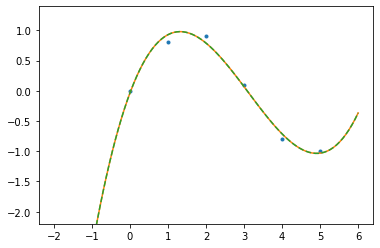

In [5]:
p30 = np.poly1d(np.polyfit(x,y,3))  # 방정식으로 변환
print(p30(4)) # 방정식으로 구한 값을 리턴
xp = np.linspace(-2,6,100)   #  100등분한 수, 
_ = plt.plot(x,y,'.',xp,p(xp),'-',xp,p30(xp),'--')
plt.ylim(-2.2)
plt.show()

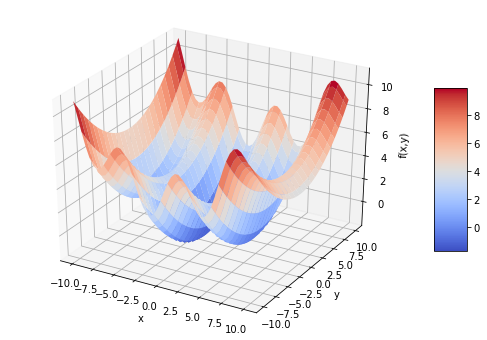

In [35]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def fm(p):
    x, y = p
    return ( np.sin(x) + 0.05 * x ** 2 +
             np.sin(x) + 0.05 * y **2)

x= np.linspace(-10,10,50)
y= np.linspace(-10,10,50)

X,Y = np.meshgrid(x,y)
Z = fm((X,Y))

fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X,Y,Z, rstride = 2, cstride = 2,
                      cmap = mpl.cm.coolwarm,
                      linewidth = 0.5, antialiased= True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

# GD : gradient descent : 경사하강법 => ANN에 쓰임
# - 지역해 문제  -> momentum 으로 해결
# - fitting 시간 문제 : 학습율 문제 => 처음에는 많이 , 점점 작게 
# 최적해를 찾아가는 것 = opimization
# Adam optimizer

In [36]:
# 무작위대입법

import scipy.optimize as spo
def fo(p):
    x, y = p
    z = ( np.sin(x) + 0.05 * x ** 2 + np.sin(x) + 0.05 * y **2)
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x,y ,z ))
    return z

output = True
opt1 = spo.brute(fo, ((-10,10.1,5),(-10,10.1,5)),   # -10~ 10.1까지 5개
                 finish = None)
print(opt1)



output = False
opt1 = spo.brute(fo, ((-10,10.1,0.1),(-10,10.1,0.1)),   # -10~ 10.1까지 5개
                 finish = None)
print(opt1)
# ANN으로 최적해를 찾는다. ( 행렬곱 이용 )

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.3380
-10.0000   0.0000   6.0880
-10.0000   5.0000   7.3380
-10.0000  10.0000  11.0880
 -5.0000 -10.0000   8.1678
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   3.1678
 -5.0000   5.0000   4.4178
 -5.0000  10.0000   8.1678
  0.0000 -10.0000   5.0000
  0.0000  -5.0000   1.2500
  0.0000   0.0000   0.0000
  0.0000   5.0000   1.2500
  0.0000  10.0000   5.0000
  5.0000 -10.0000   4.3322
  5.0000  -5.0000   0.5822
  5.0000   0.0000  -0.6678
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.3322
 10.0000 -10.0000   8.9120
 10.0000  -5.0000   5.1620
 10.0000   0.0000   3.9120
 10.0000   5.0000   5.1620
 10.0000  10.0000   8.9120
[5. 0.]
[-1.5  0. ]


In [37]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol =0.001, maxiter = 15,
                 maxfun = 20)

print(opt2)
fm(opt2)
output = False
spo.fmin(fo, (2.0,2.0), maxiter = 250)  # 할강단체법

 -1.5000   0.0000  -1.8825
 -1.5750   0.0000  -1.8760
 -1.5000   0.0003  -1.8825
 -1.4250   0.0003  -1.8772
 -1.4625   0.0002  -1.8813
 -1.5375   0.0001  -1.8807
 -1.4812   0.0002  -1.8823
 -1.5188   0.0001  -1.8820
 -1.4906   0.0001  -1.8825
 -1.5094   0.0001  -1.8823
 -1.4953   0.0001  -1.8825
 -1.4953  -0.0001  -1.8825
 -1.4930  -0.0003  -1.8825
 -1.4906   0.0000  -1.8825
 -1.4977   0.0000  -1.8825
 -1.4930   0.0000  -1.8825
 -1.4965   0.0000  -1.8825
 -1.4965  -0.0002  -1.8825
 -1.4977  -0.0001  -1.8825
 -1.4959  -0.0001  -1.8825
[-1.49589844e+00 -1.18164062e-04]
Optimization terminated successfully.
         Current function value: -0.942757
         Iterations: 41
         Function evaluations: 81


array([4.48614488e+00, 2.54130667e-05])

In [38]:
# 선형회귀 ( Linear Regression ) : 기울기와 절편 사용
# - 전체조건 : 1. 선형선 : scikits에서는 polynomial + LR를 이용 => 비선형 -> 선형
#               - 비선형은 과적합
#             2. 정규성 : 오차가 정규본포를 띈다.
#             3. 독립성 : 변수 간 다중공선성(과적합)이 없고, 한 변수에 자기회귀가 없음
#               - scikit 에서는 lasso(절대값), Ridge(제곱), ElsticNet(절대값 + 제곱)으로 해결
#               - Regulization은 에러가 이미 존재한다고 여기고 회귀( 과적합 방지 )
#             4. 등분산성 : 이산성을 고려한 모델을 사용 

In [44]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
bias = 100
X0, y, w = make_regression(
    n_samples = 200, n_features = 1, bias = bias, noise = 10, coef = True,
    random_state = 1)

print(X0[:5,:])
# 선형회귀 시, 범주형은 상수등록 필요
# 상수별로 회귀분석 실행함
X = sm.add_constant(X0)  # 상수를 고려한
print(X[:5,:])
y = y.reshape(len(y),1)
w

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[[ 1.          0.23249456]
 [ 1.         -0.03869551]
 [ 1.          0.5505375 ]
 [ 1.          0.50318481]
 [ 1.          2.18697965]]


array(86.44794301)

In [40]:
import numpy as np
w = np.linalg.inv(X.T@X) @ X.T @ y  # 역행렬
w

array([[99.79150869],
       [86.96171201]])

In [45]:
import statsmodels.api as sm
# ordinary least square : 회귀모델
model = sm.OLS(y, X) # statsmodels에서 ordinary least square를 이용한 선형회귀
result = model.fit()
print(result.summary())
# R-squared (설명력) = 회귀제곱합 / 총오차제곱합
# F value : 분산비

result.params
# durbin - watson : 자기상관성()
# Jatque-bera : 정규성(0 기준)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 13 Jan 2020   Prob (F-statistic):          8.17e-182
Time:                        13:07:39   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

array([99.79150869, 86.96171201])

In [46]:
# ==> w,b값을 구하기 위한 과정
y = 86.96171201 * x + 99.79150869

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)
dfx = pd.DataFrame(boston.data,columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEN'])
print(dfx.head())
dfy.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


,MEN
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [59]:
# 속성의 열이름 확인
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [60]:
# 변수 : 13  ==> 계수 : 13
# fit : 계수(parameter)를 구한다
model_boston = LinearRegression().fit(boston.data, boston.target)

In [64]:
# 결과 속성을 통한 결과 확인
model_boston.coef_  # coefficient 계수
model_boston.intercept_

36.459488385089855

In [67]:
predictions = model_boston.predict(boston.data)
predictions

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [68]:
predictions-boston.target  # 잔차

array([ 6.00384338e+00,  3.42556238e+00, -4.13240328e+00, -4.79296351e+00,
       -8.25647577e+00, -3.44371554e+00,  1.01808268e-01, -7.56401157e+00,
       -4.97636315e+00,  2.02621071e-02,  3.99949651e+00,  2.68679568e+00,
       -7.93478472e-01, -8.47097189e-01,  1.08348205e+00, -6.02516792e-01,
       -2.57249021e+00, -5.88598653e-01, -4.02198894e+00,  2.06136033e-01,
       -1.07614247e+00, -1.92896331e+00,  6.32881292e-01, -6.93714654e-01,
        7.83383155e-02, -5.13314391e-01, -1.13602345e+00, -9.15257194e-02,
        1.14737285e+00, -1.23571798e-01, -1.24488241e+00,  3.55923295e+00,
       -4.38894264e+00,  1.18275814e+00,  2.06758913e-01,  4.91463526e+00,
        2.34193708e+00,  2.10891142e+00, -1.78497388e+00,  5.57625688e-01,
       -6.84897746e-01,  1.42056414e+00, -9.61337195e-02, -9.02072745e-02,
        1.74149176e+00,  2.79669817e+00,  4.23200323e-01,  1.43655088e+00,
       -5.29344623e+00, -2.19392249e+00,  1.58152535e+00,  3.47222285e+00,
        2.65585080e+00,  

In [69]:
x = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y = np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
z = np.polyfit(x,y,3)
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [76]:
X = [[0.44,0.68],[0.99,0.23]]
y = [109.85,155.72]
X_test = [[0.49,0.18]]

In [77]:
# 비선형회귀 = 다차방정식으로 변환 + LR -> 비선형 회귀
# 데이터가 2차 -> 포물선 형태로 판단
# 다차 방정식의 특성을 추가
poly = PolynomialFeatures(degree = 2) 
# scikits에는 estimator(parameter 추정기(기울기,절편), predict(예측))
X_ = poly.fit_transform(X)  # transformer = fit + transform(변형) 
X_test_ = poly.fit_transform(X_test) #test데이터

In [78]:
lg = LinearRegression()  # 선형회귀
lg.fit(X_,y)
lg.coef_  # 다차 방정식 계수

array([  0.        ,  19.4606578 , -15.92235638,  27.82874066,
        -2.52988551, -14.48934431])

In [79]:
lg.predict(X_test_)  # 비선형 예측

array([126.84247142])

C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


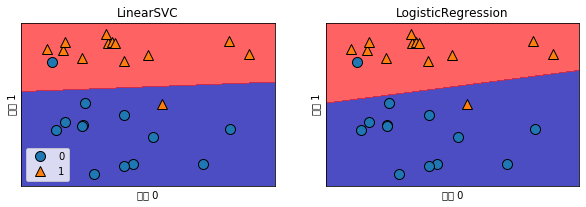

In [82]:
# 로지스틱 회귀분석  logistic function => 0~1값으로 출력
# 회귀분석 -> 결과값을 logistic function값으로 매핑( 확률값 0~1값 )
#   - 0.5를 기준으로 , 0.5보다 크면 참, 작으면 거짓 
#     - 발전 : 2개 이상의 종속변수인 경우 softmax
# 연속된 독립변수들의 입력 -> 이산적 결과 판정
# linear regression : 연속된 수치 -> 결과도 연속된 수치

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize = (10,3))  # 1행 2열 -> axes 2장
# axes : 도화지 2개 ( 하나는 SVC, 다른 하나는 Logistic로 사용 )
for model, ax in zip([LinearSVC(), LogisticRegression()], axes) :
    clf = model.fit(X,y) #계수
    mglearn.plots.plot_2d_sepa rator(clf, X, fill=True, eps = 0.5,
                                   ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax= ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

In [87]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [96]:
# select : model_select, 변수선택, feature extraction

from sklearn.datasets import load_breast_cancer  # 유방암 정보(2차원)
from sklearn.model_selection import train_test_split 
cancer = load_breast_cancer()  # 열 : 유방암의 변수 , 행 : 관측치(개인)
# data, target(종속변수)
print(cancer.feature_names)
print(cancer.data.shape)
data = pd.DataFrame(cancer.data)
print(data.head())

# train 데이터, test데이터  random 분리 ( 0.75 : 0.25 )
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                  random_state=42) # stratify : 층화(target을 중심으로 split)
                                                   # random_state = 초기값 (seed와 같음)

logreg = LogisticRegression().fit(X_train,y_train)

# score : 정분류율 측정 ( 전체 중 실제값 == 예측값이 맞는 것만 확인 )     <---> 오분류율
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test,y_test)))
# 정밀도, 재현율, 민감도, 특이도 확인 필요

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)
      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.1

C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [100]:
import numpy as np
from sklearn.model_selection import GroupKFold
# model_selection : 모델 데이터를 구분할 때 사용 
x = np.array([[1,2],[3,4],[5,6],[7,8]])  # 4x2
y = np.array([1,2,3,4]) # 종속변수
groups = np.array([0,0,2,2])
groups_kfold = GroupKFold(n_splits = 2)
groups_kfold.get_n_splits(x,y,groups)
print(groups_kfold)
for train_index, test_index in groups_kfold.split(x,y,groups) :
    print("TRAIN : \n", train_index, "TEST : \n", test_index)
    x_train,x_test = x[train_index], x[test_index]
    y_train,y_test = y[train_index], y[test_index]
    print(x_train, x_test, y_train,y_test)

GroupKFold(n_splits=2)
TRAIN : 
 [0 1] TEST : 
 [2 3]
[[1 2]
 [3 4]] [[5 6]
 [7 8]] [1 2] [3 4]
TRAIN : 
 [2 3] TEST : 
 [0 1]
[[5 6]
 [7 8]] [[1 2]
 [3 4]] [3 4] [1 2]


In [108]:
sample = ['problem of evil',
         'evil queen',
         'horizon problem']

In [109]:
# text mining -> vectorizing

from sklearn.feature_extraction.text import CountVectorizer 

vec= CountVectorizer() # feature_extraction( 특징 추출 )
x = vec.fit_transform(sample)
print(type(x))
print(x)
pd.DataFrame(x.toarray(), columns = vec.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 3)	1
  (0, 2)	1
  (0, 0)	1
  (1, 0)	1
  (1, 4)	1
  (2, 3)	1
  (2, 1)	1


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
# term frequency( 단어빈도 ) + inverse document frequency( 역문서빈도 )
# 역문서 : 단어수/전체문서 ==> 전체문서/단어수 ( 단어수가 적게 나올 수록 값이 크고 중요도가 높음 )
vec = TfidfVectorizer()  
x = vec.fit_transform(sample)
pd.DataFrame(x.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [ ]:
# 분류
# 예측


In [111]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0,2,1,3]
y_true = [0,1,2,3]

accuracy_score(y_true,y_pred)

0.5

In [112]:
# SVC : rbt( 방사형 커널 ), poly, sigmoid( 0 ~ 1 )
# cross validation =5  : 데이터를 5 덩어리도 나눔
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
x,y = iris.data, iris.target

# support vector :
clf = svm.SVC(gamma='scale', random_state = 0) # 모델을 기리키는 이름  gamma : 커널의 모양 통제
cross_val_score(clf, x, y , scoring = 'recall_macro',cv= 5)  # recall : 민감도

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [113]:
# 척도

from sklearn.metrics import confusion_matrix
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]
confusion_matrix(y_true,y_pred)  # 혼동행렬

#   0,1,2
# 0 2 0 0
# 1 0 0 1
# 2 1 0 2



array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [119]:
import numpy as np
import sklearn.metrics as metrics
y= np.array([1,1,1,1,0,0]) # 실제값
p = np.array([1,1,0,0,0,0]) # 예측값
accuracy = np.mean(np.equal(y,p)) # 예측값
right = np.sum(y*p == 1)  # 1로 같은 것
precision = right / np.sum(p)  # 정밀도 = TP / (TP + FP)
recall = right / np.sum(y)   # 민감도 = TP / (TP + N)
f1 = 2* precision * recall/(precision + recall)
f1

# 종속변수의 실제값과 예측값 
print("accuracy : ", metrics.accuracy_score(y,p))
print("precision : ", metrics.precision_score(y,p))
print("recall : ", metrics.recall_score(y,p))
print("f1 : ", metrics.f1_score(y,p))

print(metrics.classification_report(y,p))  # 다 포함되어 나옴
print(metrics.confusion_matrix(y,p))

accuracy :  0.6666666666666666
precision :  1.0
recall :  0.5
f1 :  0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


In [164]:
# 문제 : 
# 1) Logisticregression을 하세요
# 2) 훈련데이터를 예측하세요
# 3) 결과를 평가하세요 ( precision, recall, f1_score )


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

x, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0,
                          random_state=0)

print(x[:5,:])
print(x.shape)
model = LogisticRegression()
model.fit(x,y) # 계수 완성

y_hat = model.predict(x)
precision =  metrics.precision_score(y,y_hat)
print("정밀도 : ", precision)
print("민감도 : ", metrics.recall_score(y,y_hat))
print("f1 : ", metrics.f1_score(y,y_hat))



[[ 2.03418291 -0.38437236]
 [ 4.06377686  0.17863836]
 [ 0.41966783 -1.38206096]
 [-1.27225991  0.6600493 ]
 [-0.81664689  1.16942291]]
(16, 2)
정밀도 :  0.8571428571428571
민감도 :  0.75
f1 :  0.7999999999999999


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
